In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import tarfile
from pandas.errors import EmptyDataError
import time

In [ ]:

audio=pd.read_csv('synthetic_IoT_audio.csv')
audio['label']='Audio'
camera=pd.read_csv('synthetic_IoT_camera.csv')
camera['label']='Camera'
ha=pd.read_csv('synthetic_IoT_home_automation.csv')
ha['label']='Home Automation'
train=pd.concat([audio, camera, ha], axis=0)
train=train.iloc[:,1:]
train


,L7_http,ethernet_frame_size,ttl,protocol,source_port,dest_port,DNS_count,ARP_count,L3_ip_dst_count,sum_et,skew_et,kurt_et,kurt_e,var_e,epoch_timestamp,inter_arrival_time,label
0,0,244,17,4,10022,14294,1,0,11,2523,1,5,-2,70221,1633986816,1,Audio
1,0,100,57,4,24414,10694,1,0,7,12641,2,2,-1,93659,1634028928,2,Audio
2,0,191,94,5,19511,34950,1,0,8,2975,2,0,-1,30498,1633994240,1,Audio
3,0,513,65,11,24445,31315,3,0,4,4835,0,1,-2,73763,1633737088,0,Audio
4,0,100,6,1,9843,24495,0,0,16,2282,0,5,-2,193752,1633893120,1,Audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15859,0,574,113,4,18627,26391,7,1,13,16127,0,1,10,17311,1633170176,14,Home Automation
15860,0,484,58,8,9654,39311,0,6,12,15233,-2,7,2,6332,1633598208,35,Home Automation
15861,0,726,26,10,35887,18783,21,6,14,4000,-2,5,1,24699,1633817728,68,Home Automation
15862,0,210,16,14,8288,43507,21,0,12,8976,-3,10,4,4867,1633615872,50,Home Automation


In [ ]:
'''train=pd.read_csv('synthetic_IoT_dataset.csv')
train=train.iloc[:,1:]

train
'''

"train=pd.read_csv('synthetic_IoT_dataset.csv')\ntrain=train.iloc[:,1:]\n\ntrain\n"

In [ ]:

train['ethernet_frame_size ']=abs(train['ethernet_frame_size '])
train['ttl']=abs(train['ttl'])
train['protocol ']=abs(train['protocol '])
train['source_port']=abs(train['source_port'])
train['dest_port']=abs(train['dest_port'])
train['sum_et']=abs(train['sum_et'])+40 #add 40
train['var_e']=abs(train['var_e'])
train['inter_arrival_time']=abs(train['inter_arrival_time'])


In [ ]:
unique_values_set = set(train['label'])

# Print the unique values
print(unique_values_set)
#print(train['var_e'] < 0)
#print(min(abs(train['inter_arrival_time']) ))
#(train['inter_arrival_time'] < 0).any().any()

{'Camera', 'Home Automation', 'Audio'}


In [ ]:
'''unique_values_set = set(test['inter_arrival_time'])

# Print the unique values
print(unique_values_set)
(test['inter_arrival_time'] < 0).any().any()
'''

"unique_values_set = set(test['inter_arrival_time'])\n\n# Print the unique values\nprint(unique_values_set)\n(test['inter_arrival_time'] < 0).any().any()\n"

In [ ]:
#train=pd.read_csv('Combined_IoT_profiling_dataset_2022_train_set.csv')
test=pd.read_csv('Combined_IoT_profiling_dataset_2022_test_set.csv')
test=test.iloc[:,1:]

test

,L4_tcp,L4_udp,L7_http,L7_https,port_class_src,port_class_dst,pck_size,ip_dst_new,ethernet_frame_size,ttl,...,skew_e,kurt_e,var_e,q3_e,q1_e,iqr_e,epoch_timestamp,inter_arrival_time,time_since_previously_displayed_frame,label
0,0,1,0,0,2,1,1358,2899902734,1392,64,...,1.150588,-0.669909,319209.500000,403.25,41.75,361.50,1.634051e+09,0.010379,3.066660,Audio_nestmini
1,0,1,0,0,2,1,1358,2899944708,1392,64,...,-0.026645,-1.962966,372306.583333,1358.00,185.00,1173.00,1.634055e+09,0.000000,1.237607,Audio_nestmini
2,0,1,0,0,2,1,41,2398822826,75,64,...,-0.446616,-1.500000,304628.222222,1161.00,502.50,658.50,1.634054e+09,0.000544,2.422310,Audio_nestmini
3,1,0,1,0,1,2,32,3232270754,66,60,...,1.580511,0.898201,206103.277344,278.25,32.75,245.50,1.634051e+09,0.025173,4.380620,Audio_nestmini
4,0,1,0,0,1,2,33,3232270754,67,60,...,1.093833,-0.709158,281667.687500,507.50,137.25,370.25,1.634055e+09,0.047378,1.234954,Audio_nestmini
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46220,0,1,0,0,3,2,926,2211110130,960,64,...,-0.397607,-1.644381,203203.102041,1096.00,234.00,862.00,1.634046e+09,0.000000,22.688772,Camera_simcam
46221,0,1,0,0,3,2,1096,2211110130,1130,64,...,-3.266359,9.494603,26565.324100,1096.00,1096.00,0.00,1.634046e+09,0.003249,13.290198,Camera_simcam
46222,0,1,0,0,3,2,1096,2211110130,1130,64,...,-0.145664,-1.777479,217474.864266,1096.00,60.00,1036.00,1.634046e+09,0.000000,27.829223,Camera_simcam
46223,0,1,0,0,3,2,1096,2211110130,1130,64,...,-1.338736,0.200780,131291.418283,1096.00,760.50,335.50,1.634046e+09,0.000675,21.360586,Camera_simcam


In [ ]:
print("Columns in Dataset: ",train.columns)

Columns in Dataset:  Index(['L7_http', 'ethernet_frame_size ', 'ttl', 'protocol ', 'source_port',
       'dest_port', 'DNS_count', 'ARP_count', 'L3_ip_dst_count', 'sum_et',
       'skew_et', 'kurt_et', 'kurt_e', 'var_e', 'epoch_timestamp',
       'inter_arrival_time', 'label'],
      dtype='object')


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184835 entries, 0 to 15863
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   L7_http               184835 non-null  int64 
 1   ethernet_frame_size   184835 non-null  int64 
 2   ttl                   184835 non-null  int64 
 3   protocol              184835 non-null  int64 
 4   source_port           184835 non-null  int64 
 5   dest_port             184835 non-null  int64 
 6   DNS_count             184835 non-null  int64 
 7   ARP_count             184835 non-null  int64 
 8   L3_ip_dst_count       184835 non-null  int64 
 9   sum_et                184835 non-null  int64 
 10  skew_et               184835 non-null  int64 
 11  kurt_et               184835 non-null  int64 
 12  kurt_e                184835 non-null  int64 
 13  var_e                 184835 non-null  int64 
 14  epoch_timestamp       184835 non-null  int64 
 15  inter_arrival_time    1

In [ ]:
train.describe()

,L7_http,ethernet_frame_size,ttl,protocol,source_port,dest_port,DNS_count,ARP_count,L3_ip_dst_count,sum_et,skew_et,kurt_et,kurt_e,var_e,epoch_timestamp,inter_arrival_time
count,184835.0,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,1.848350e+05,184835.000000
mean,0.0,813.573874,147.841361,12.610550,38613.837774,33259.184451,3.322022,1.273606,9.764136,7453.448660,0.289826,-0.210929,0.556897,221099.000444,1.633834e+09,3.239397
std,0.0,394.121397,66.100695,3.990114,14389.710675,14257.163745,3.944745,1.472654,6.550886,5603.796295,1.645836,2.003759,2.680057,133081.597271,1.897676e+05,7.787840
min,0.0,42.000000,0.000000,0.000000,20.000000,13.000000,0.000000,0.000000,0.000000,82.000000,-4.000000,-2.000000,-2.000000,0.000000,1.632857e+09,0.000000
25%,0.0,491.000000,99.000000,11.000000,28565.000000,22832.500000,1.000000,0.000000,4.000000,2972.000000,-1.000000,-2.000000,-1.000000,110326.000000,1.633688e+09,0.000000
50%,0.0,847.000000,158.000000,14.000000,40346.000000,33474.000000,2.000000,1.000000,9.000000,6084.000000,0.000000,-1.000000,0.000000,217800.000000,1.633852e+09,1.000000
75%,0.0,1141.000000,202.000000,16.000000,50013.000000,43889.500000,4.000000,2.000000,14.000000,10818.000000,2.000000,0.000000,1.000000,323644.500000,1.633994e+09,3.000000
max,0.0,1513.000000,254.000000,16.000000,64776.000000,64859.000000,34.000000,15.000000,37.000000,30094.000000,4.000000,14.000000,14.000000,524152.000000,1.634145e+09,104.000000


In [ ]:
train['label'].value_counts()

,count
label,
Camera,153937
Home Automation,15864
Audio,15034


# Data Clearning

In [ ]:
# Removing infinity and nan values
train.replace(np.inf,np.nan,inplace=True)
train.replace(-np.inf,np.nan,inplace=True)
train.dropna(inplace=True)
test.replace(np.inf,np.nan,inplace=True)
test.replace(-np.inf,np.nan,inplace=True)
test.dropna(inplace=True)

In [ ]:
#Removing duplicates
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [ ]:
train.shape

(184835, 17)

<Axes: >

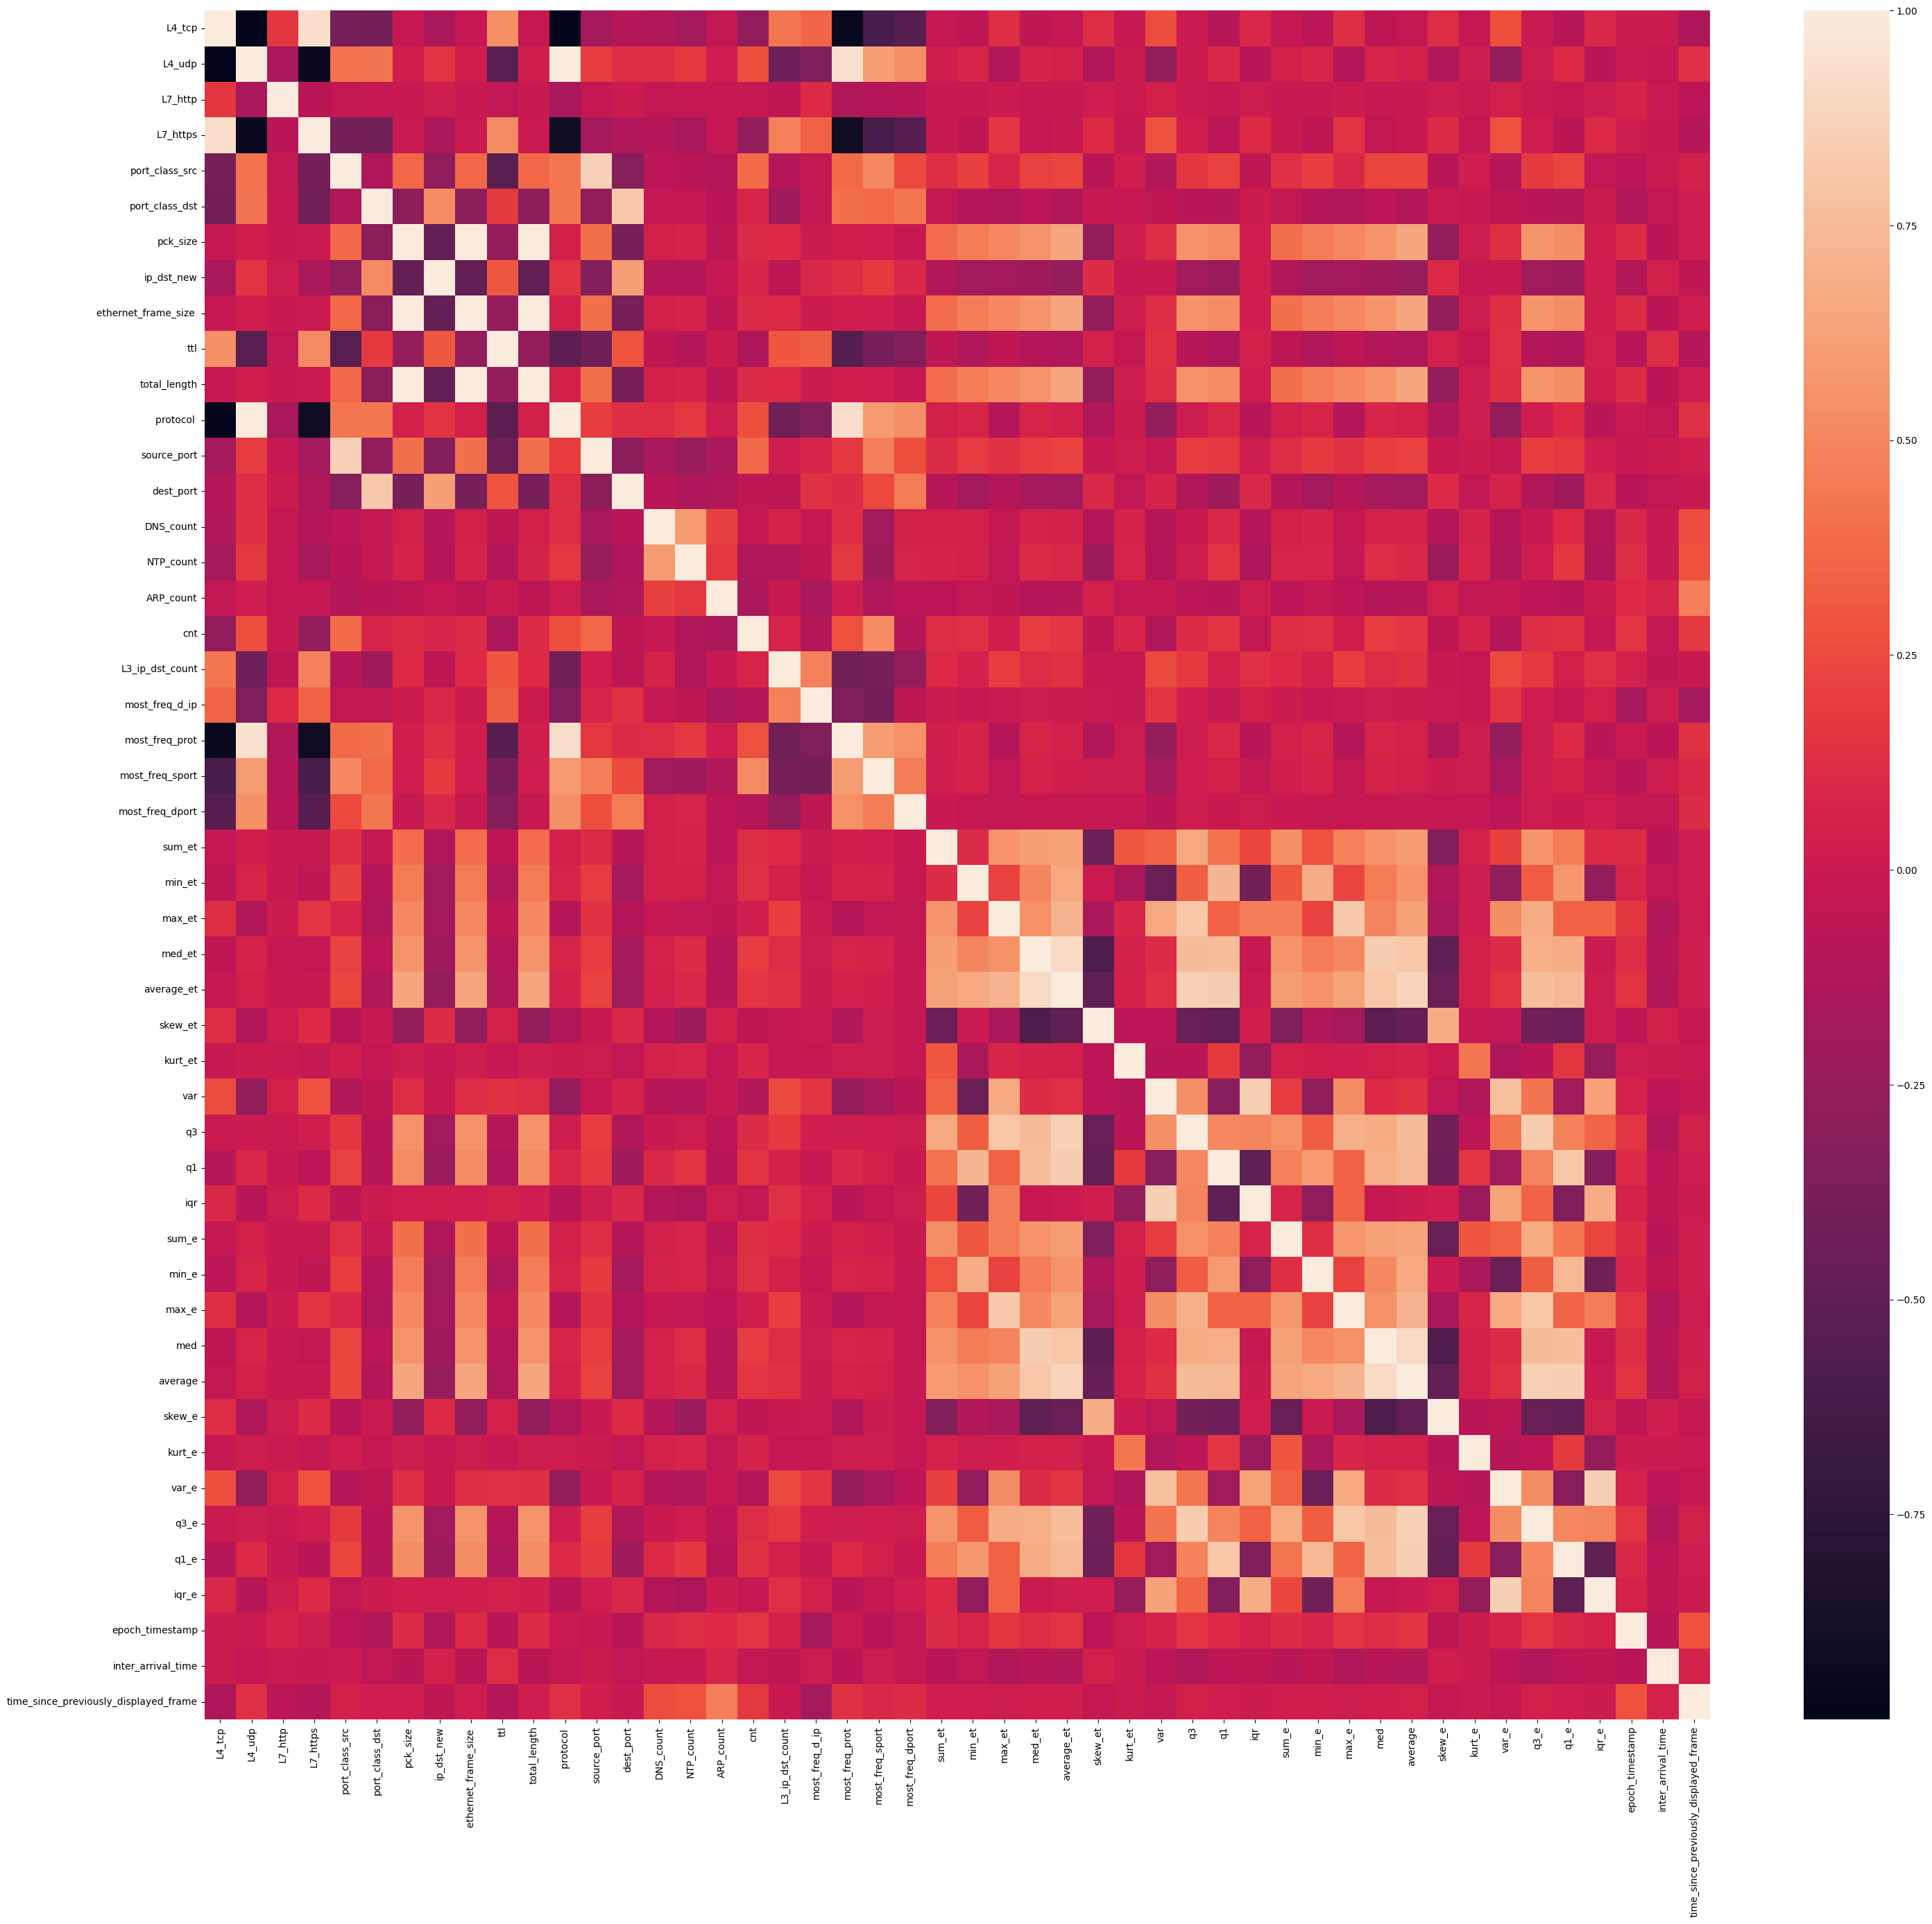

In [ ]:
#Finding and plotting correlations
corr = test.corr(numeric_only=True)
plt.figure(figsize=(35, 32))
sns.heatmap(corr)

In [ ]:
corr_cols=['L7_https','most_freq_sport','pck_size','cnt','most_freq_dport','most_freq_prot','min_et', 'max_et','med_et','average_et','q3','q1', 'min_e', 'max_e', 'med', 'average', 'q3_e', 'q1_e' , 'time_since_previously_displayed_frame','port_class_src','port_class_dst','pck_size','total_length','ip_dst_new', 'L4_tcp', 'NTP_count','most_freq_d_ip','sum_e','skew_e', 'iqr','var','iqr_e','L4_udp']
#train.drop(columns=corr_cols,axis=1,inplace=True)
test.drop(columns=corr_cols,axis=1,inplace=True)

<Axes: >

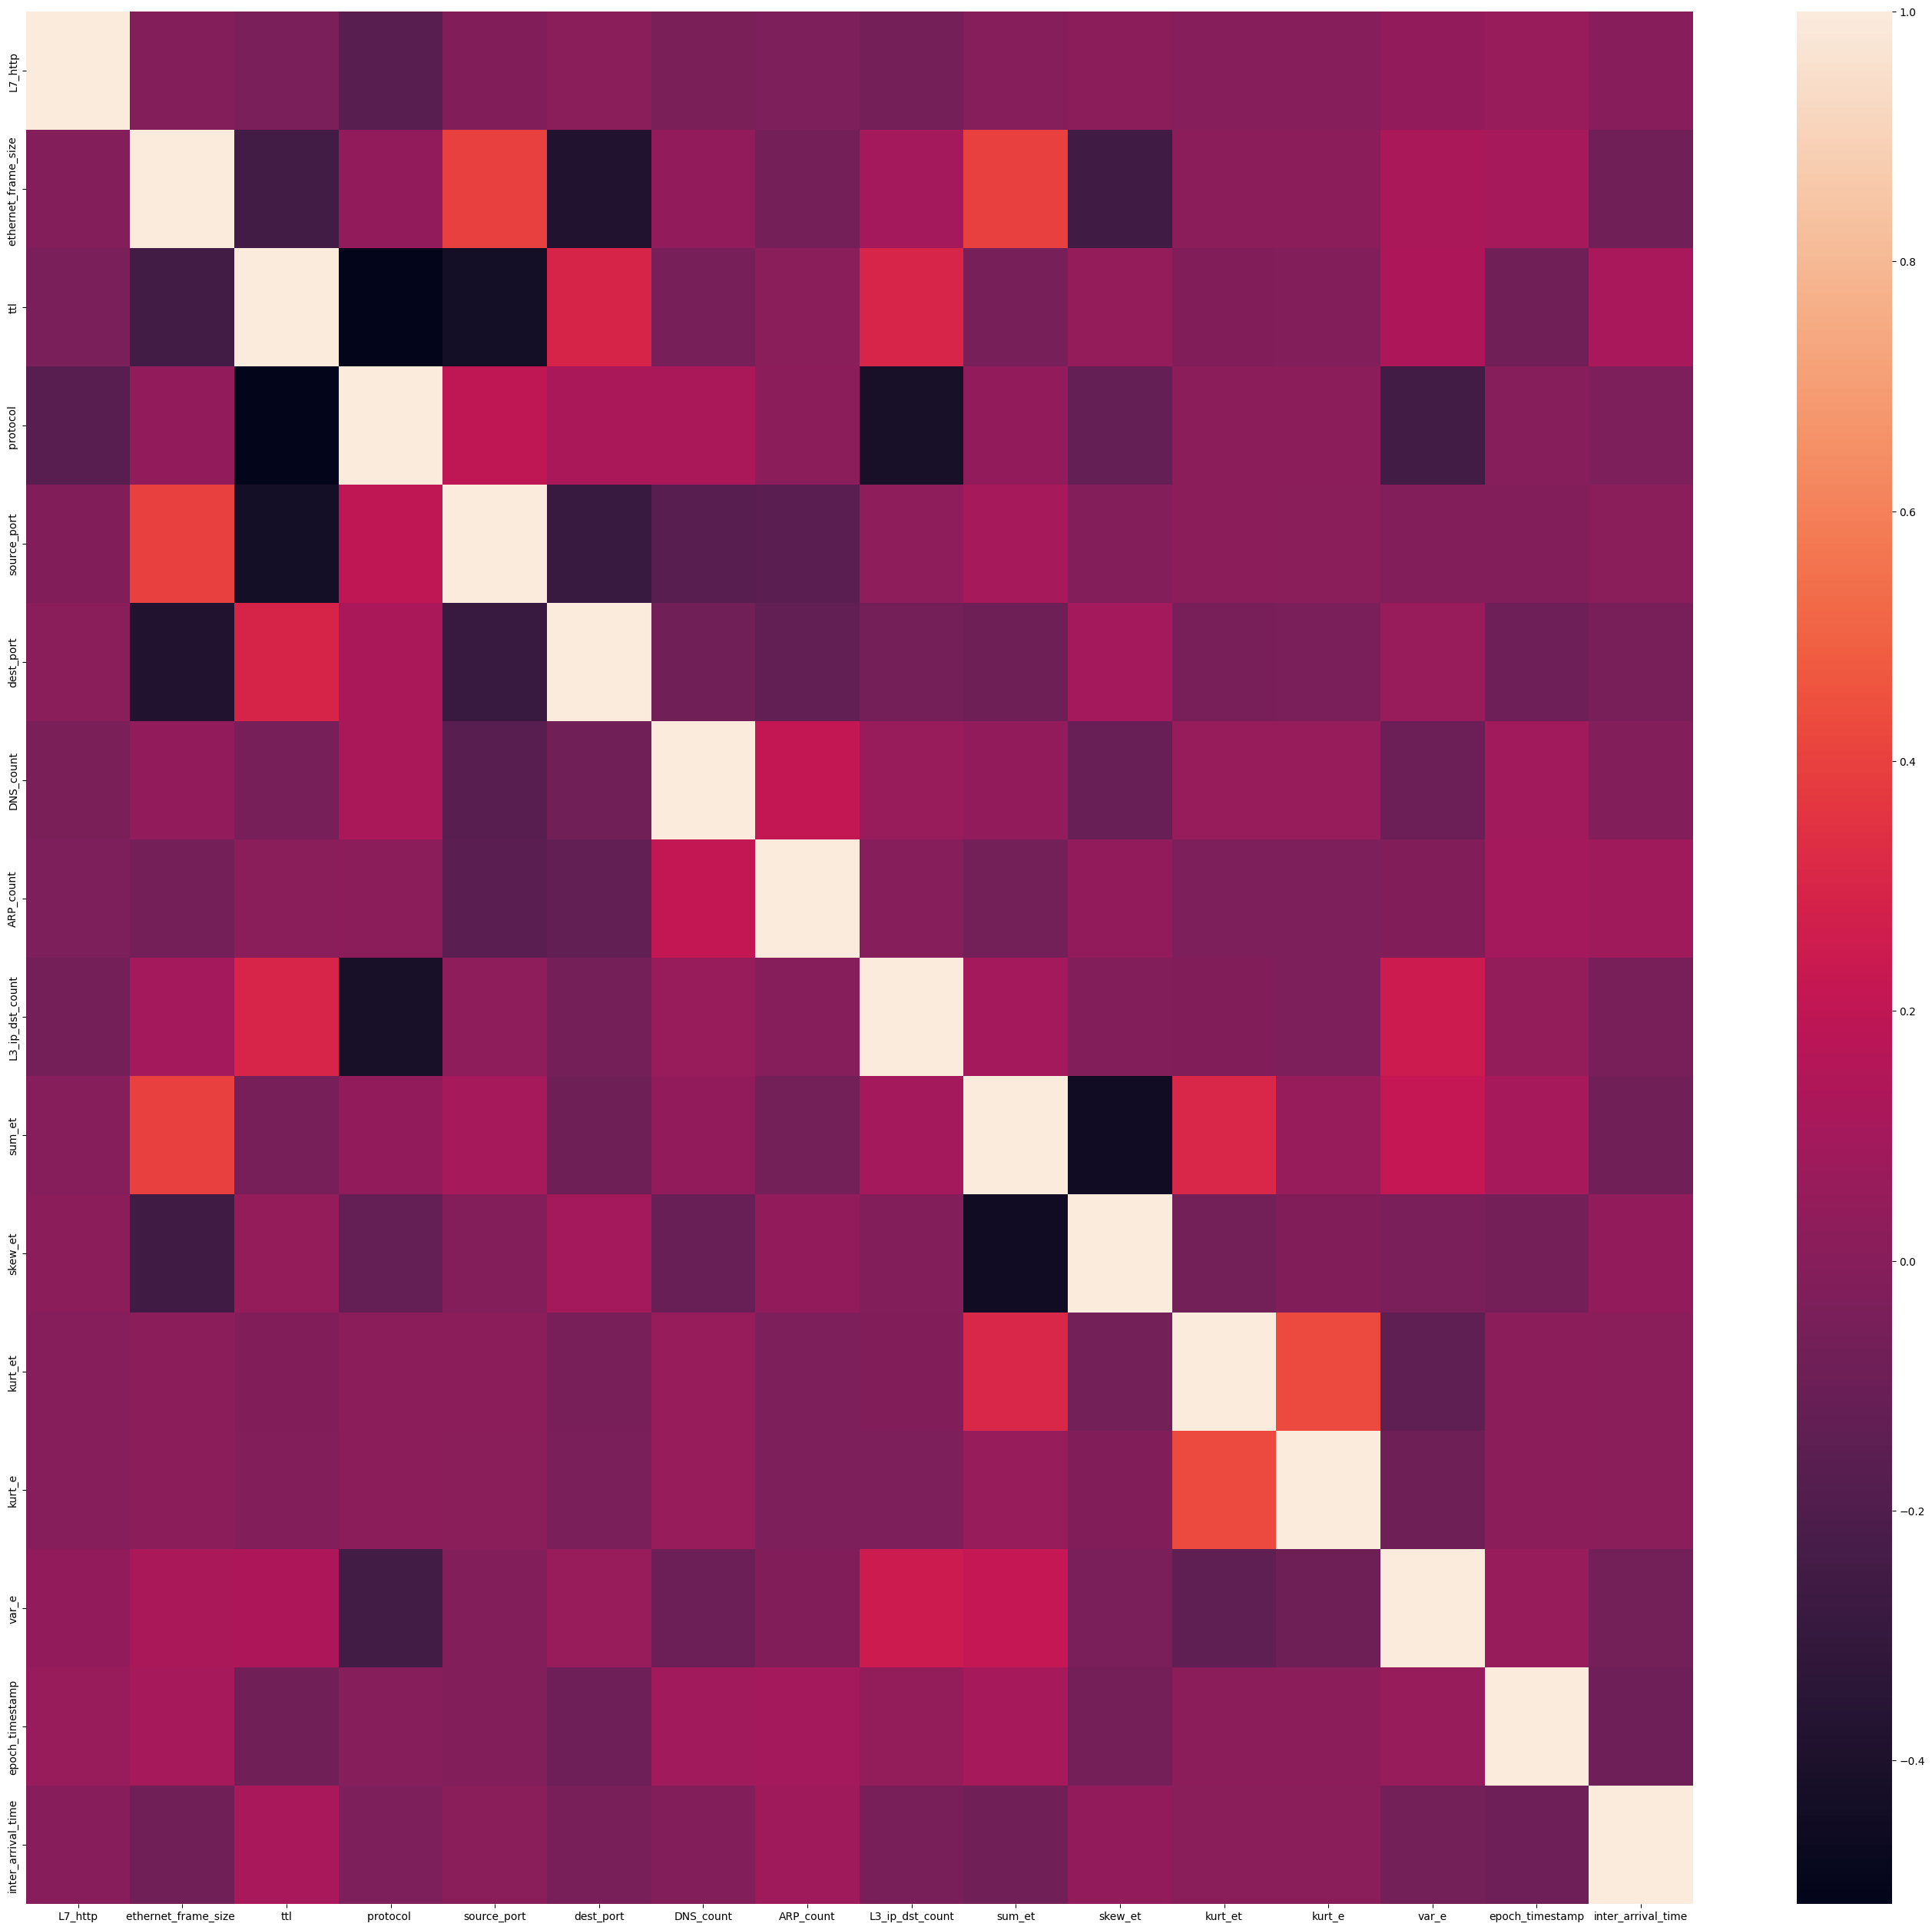

In [ ]:
#Finding and plotting correlations
corr = test.corr(numeric_only=True)
plt.figure(figsize=(35, 32))
sns.heatmap(corr)

In [ ]:
test.shape

(46184, 17)

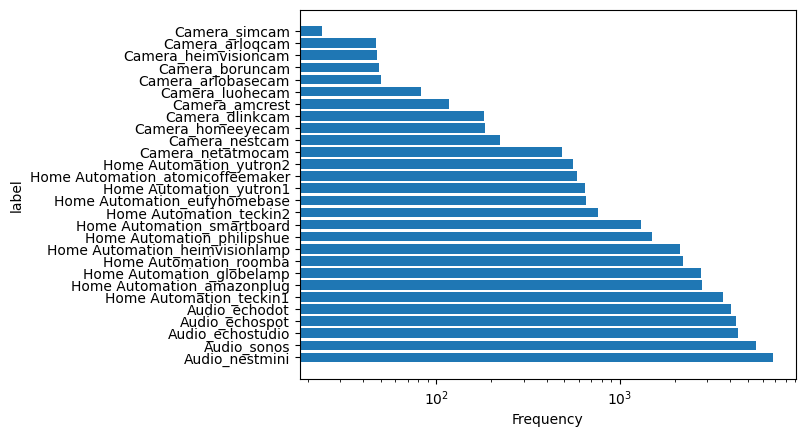

In [ ]:
plt.barh(test['label'].unique(), test['label'].value_counts())


plt.xlabel("Frequency")
plt.xscale('log')

plt.ylabel("label")

plt.show()

# Merging classes

In [ ]:
'''train_df=train.copy()
mask = train_df['label'].str.contains('Camera')
train_df.loc[mask, 'label'] = 'Camera'
mask = train_df['label'].str.contains('Audio')
train_df.loc[mask, 'label'] = 'Audio'
mask = train_df['label'].str.contains('Home Automation')
train_df.loc[mask, 'label'] = 'Home Automation'
'''

"train_df=train.copy()\nmask = train_df['label'].str.contains('Camera')\ntrain_df.loc[mask, 'label'] = 'Camera'\nmask = train_df['label'].str.contains('Audio')\ntrain_df.loc[mask, 'label'] = 'Audio'\nmask = train_df['label'].str.contains('Home Automation')\ntrain_df.loc[mask, 'label'] = 'Home Automation'\n"

In [ ]:
test_df=test.copy()
mask = test_df['label'].str.contains('Camera')
test_df.loc[mask, 'label'] = 'Camera'
mask = test_df['label'].str.contains('Audio')
test_df.loc[mask, 'label'] = 'Audio'
mask = test_df['label'].str.contains('Home Automation')
test_df.loc[mask, 'label'] = 'Home Automation'

In [ ]:
train_df=train.copy()
train_df['label'].value_counts()

,count
label,
Camera,153937
Home Automation,15864
Audio,15034


In [ ]:
test_df['label'].value_counts()

,count
label,
Camera,38452
Home Automation,3971
Audio,3761


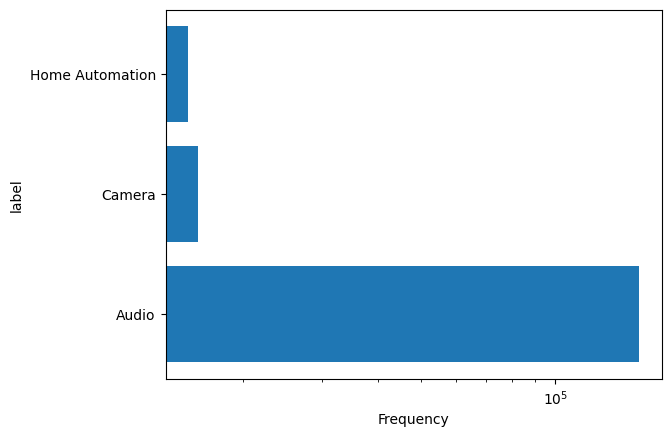

In [ ]:
plt.barh(train_df['label'].unique(), train_df['label'].value_counts())


plt.xlabel("Frequency")
plt.xscale('log')

plt.ylabel("label")

plt.show()

In [ ]:

label_encoder = LabelEncoder()
train_df['label']=label_encoder.fit_transform(train_df['label'])
train_df['label'].unique()



array([0, 1, 2])

In [ ]:
label_encoder = LabelEncoder()
test_df['label']=label_encoder.fit_transform(test_df['label'])
test_df['label'].unique()

array([0, 2, 1])

In [ ]:

train_X=train_df.drop(columns='label')
train_y=train_df['label'].astype('int')
test_X=test_df.drop(columns='label')
test_y=test_df['label'].astype('int')

In [ ]:
test_X=test_X.astype('int')
test_X


,L7_http,ethernet_frame_size,ttl,protocol,source_port,dest_port,DNS_count,ARP_count,L3_ip_dst_count,sum_et,skew_et,kurt_et,kurt_e,var_e,epoch_timestamp,inter_arrival_time
0,0,1392,64,17,39848,443,2,0,12,1656,1,0,0,319209,1634050629,0
1,0,1392,64,17,48676,443,2,0,19,4707,0,-1,-1,372306,1634054762,0
2,0,75,64,17,44453,443,4,0,14,2465,0,-1,-1,304628,1634054453,0
3,1,66,60,6,80,42148,0,0,12,5379,1,0,0,206103,1634050553,0
4,0,67,60,17,443,48676,2,0,19,1923,1,0,0,281667,1634054762,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46220,0,960,64,17,59861,11123,0,0,14,12560,0,0,-1,203203,1634046314,0
46221,0,1130,64,17,59861,11123,0,0,15,6937,-1,0,9,26565,1634046466,0
46222,0,1130,64,17,59861,29483,4,0,15,5830,0,-1,-1,217474,1634046405,0
46223,0,1130,64,17,59861,11123,0,0,15,7930,2,2,0,131291,1634046474,0


In [ ]:
train_y.value_counts()

In [ ]:
#Random undersampling for balancing data
rus = RandomUnderSampler(random_state=0)
train_X_rus, train_y_rus = rus.fit_resample(train_X, train_y)
test_X_rus, test_y_rus = rus.fit_resample(test_X, test_y)

In [ ]:
train_y_rus.value_counts()

,count
label,
0,15034
1,15034
2,15034


In [ ]:
test_y_rus.value_counts()

,count
label,
0,3761
1,3761
2,3761


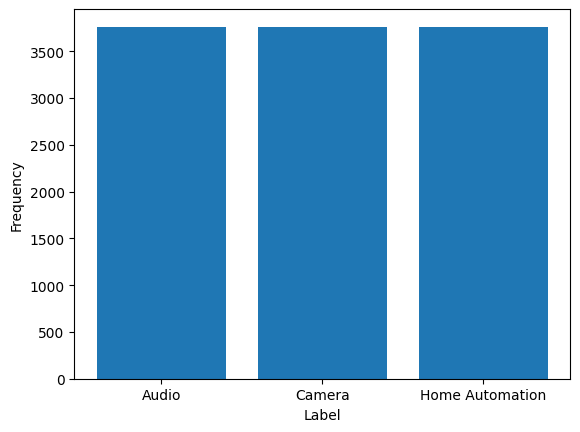

In [ ]:
x=[]
for c in test_y_rus.unique():
  if c==1:
    x.append('Camera')
  elif c==2:
    x.append('Home Automation')
  else:
     x.append('Audio')
plt.bar(x, test_y_rus.value_counts())


plt.xlabel("Label")


plt.ylabel("Frequency")

plt.show()

In [ ]:
# Feature scaling
Minmax=MinMaxScaler()
train_x_rus=Minmax.fit_transform(train_X_rus)
test_x_rus=Minmax.fit_transform(test_X_rus)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
train_start=time.time()
param_grid = {
    'max_depth': [2,3,4],
    'learning_rate': [0.1, 0.01, 0.001]
}
# Create an instance of the XGBClassifier
xgb = XGBClassifier(objective='multi:softprob')
model = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
model.fit(train_x_rus, train_y_rus)
print("Best parameters of xgboost: ",model.best_params_)
train_end=time.time()
test_start=time.time()
predictions = model.predict(test_x_rus)
new = np.asarray(test_y_rus)
test_end=time.time()
#cm=confusion_matrix(predictions,test_y_rus,labels=model.classes_)
print(classification_report(predictions,test_y_rus))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
#disp.plot()
#plt.show()

train_time_elapsed_xgb=train_end-train_start
test_time_elapsed_xgb=test_end-test_start
print("Model training time elapsed: ", train_time_elapsed_xgb)
print("Model testing time elapsed: ", test_time_elapsed_xgb)

Best parameters of xgboost:  {'learning_rate': 0.1, 'max_depth': 4}
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      4083
           1       0.64      0.46      0.54      5244
           2       0.33      0.64      0.44      1956

    accuracy                           0.58     11283
   macro avg       0.58      0.60      0.57     11283
weighted avg       0.64      0.58      0.59     11283

Model training time elapsed:  79.25279450416565
Model testing time elapsed:  0.04239487648010254


Best parameters of Random Forest:  {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.80      0.60      0.68      4984
           1       0.58      0.44      0.50      5038
           2       0.23      0.69      0.35      1261

    accuracy                           0.54     11283
   macro avg       0.54      0.58      0.51     11283
weighted avg       0.64      0.54      0.56     11283



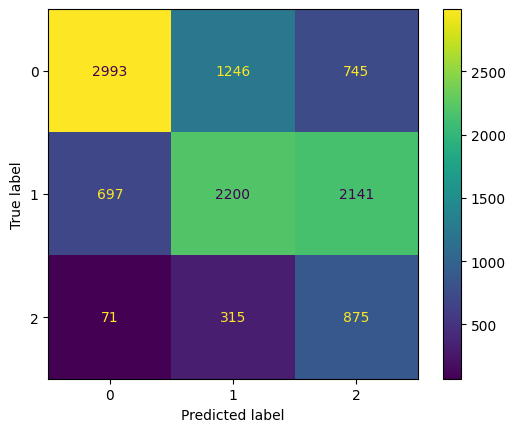

Model training time elapsed:  369.7541661262512
Model test time elapsed:  0.09256434440612793


In [ ]:
from sklearn.ensemble import RandomForestClassifier
train_start=time.time()
param_grid = {
    'criterion': ['gini','entropy'],
    'n_estimators': [10,100,200],
    'max_depth':[2,3,4]
}
rf = RandomForestClassifier(random_state = 42)
classifier = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
classifier.fit(train_x_rus, train_y_rus)
print("Best parameters of Random Forest: ",classifier.best_params_)
train_end=time.time()
test_start=time.time()
predictions = classifier.predict(test_x_rus)
new = np.asarray(test_y_rus)
test_end=time.time()
cm=confusion_matrix(predictions,test_y_rus,labels=classifier.classes_)
print(classification_report(predictions,test_y_rus))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

train_time_elapsed_rf=train_end-train_start
test_time_elapsed_rf=test_end-test_start
print("Model training time elapsed: ",train_time_elapsed_rf)
print("Model test time elapsed: ",test_time_elapsed_rf)

In [ ]:
from sklearn import svm
train_start=time.time()
param_grid = {
   'kernel':['rbf','linear'],
   'C':[ 0.1, 1,0.01],
   'gamma':[ 0.1, 1,0.01]
}

svm_model = svm.SVC()
rbf= GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
rbf.fit(train_x_rus, train_y_rus)
print("Best parameters of SVM: ",rbf.best_params_)
train_end=time.time()
test_start=time.time()
predictions = rbf.predict(test_x_rus)
new = np.asarray(test_y_rus)
test_end=time.time()
cm=confusion_matrix(predictions,test_y_rus,labels=rbf.classes_)
print(classification_report(predictions,test_y_rus))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rbf.classes_)
disp.plot()
plt.show()

train_time_elapsed_svm=train_end-train_start
test_time_elapsed_svm=test_end-train_start
print("Model training time elapsed: ", train_time_elapsed_svm)
print("Model test time elapsed: ", test_time_elapsed_svm)

In [ ]:
plt.barh(['Camera', 'Home Automation', 'Audio'], [191175,19808,18774])


plt.xlabel("Frequency")
#plt.xscale('log')

plt.ylabel("label")

plt.show()